# Terrain Motion Displacement - Wiltshire (Inside) 10cm (Non-Scaled)

## 1) IPython Setup

In [36]:
%%javascript
/* 
 * Force prevention of output scroll toggle.
 * Original source: https://github.com/ipython/ipython/issues/2172#issuecomment-53708976 
 */
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [37]:
%load_ext ipycache
%matplotlib inline

# We have to add a reference to the parent folder in order to access the modules.
import sys,os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import template_matching_scaling as templ
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType
from tse.tse_datautils import TSEDataUtils

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


## 2) Calculate Displacement 

In [38]:
%%cache cache_wiltshire_outside.pkl results_dict

config_file = "../../perspective_calibration/data/calibdata_23_03_15_11_07_04.txt"

image_pairs = [
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG1.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG2.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG3.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG4.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG5.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG6.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG7.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG8.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG9.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG10.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG11.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG12.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG11.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG12.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG13.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG14.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG15.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG16.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG17.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG18.JPG"),
                ("../../eval_data/motion_images/wiltshire_outside_10cm/IMG19.JPG", "../../eval_data/motion_images/wiltshire_outside_10cm/IMG20.JPG")
              ]

patch_sizes = [100, 200]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1, match_method2, match_method3, match_method4]

results_dict = templ.start_tests(image_pairs, patch_sizes, match_methods, config_file, use_scaling=False, plot_results=False)

[Skipped the cell's code and loaded variables results_dict from file '/Users/connorgoddard/Desktop/CS39440-major-project/src/template_matching_scaling/notebooks/cache_wiltshire_outside.pkl'.]


## 3) Tests

### Test 1: IMG1/IMG2 - 100px patch - *DistanceEuclidean*, *DistanceCorr*, *HistCorrel*, *HistChiSqr*

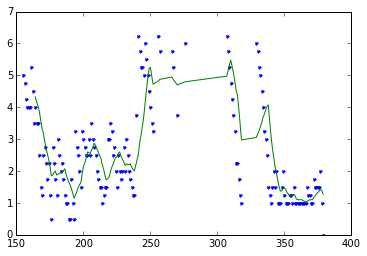

In [39]:
results_pair1_100 = results_dict['IMG1.JPG_IMG2.JPG'][100]

raw_results_pair1_100 = []
image_rows = []

for key in results_pair1_100:
    raw_results_pair1_100.append([o.displacement for o in results_pair1_100[key]])
    image_rows = [o.row for o in results_pair1_100[key]]

averaged_results_pair1_100 = TSEDataUtils.calc_element_wise_average(raw_results_pair1_100)

filtered_results_pair1_100 = TSEDataUtils.filter_outliers_ab_dist_median(averaged_results_pair1_100)

image_rows = np.array(image_rows)[TSEDataUtils.filter_outliers_ab_dist_median_indices(averaged_results_pair1_100)]

y_moving_average = TSEDataUtils.calc_moving_average_array(np.array(filtered_results_pair1_100), 10)

plt.plot(image_rows, np.array(filtered_results_pair1_100), "b.")
plt.plot(image_rows[len(image_rows) - len(y_moving_average):], y_moving_average, "g-")
plt.show()

### Test 2: IMG1/IMG2 - 200px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

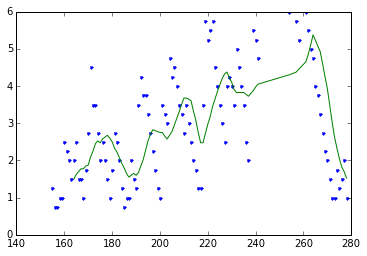

In [40]:
results_pair1_200 = results_dict['IMG1.JPG_IMG2.JPG'][200]

raw_results_pair1_200 = []
image_rows = []

for key in results_pair1_200:
    raw_results_pair1_200.append([o.displacement for o in results_pair1_200[key]])
    image_rows = [o.row for o in results_pair1_200[key]]

averaged_results_pair1_200 = TSEDataUtils.calc_element_wise_average(raw_results_pair1_200)

filtered_results_pair1_200 = TSEDataUtils.filter_outliers_ab_dist_median(averaged_results_pair1_200)

image_rows = np.array(image_rows)[TSEDataUtils.filter_outliers_ab_dist_median_indices(averaged_results_pair1_200)]

y_moving_average = TSEDataUtils.calc_moving_average_array(np.array(filtered_results_pair1_200), 10)

plt.plot(image_rows, np.array(filtered_results_pair1_200), "b.")
plt.plot(image_rows[len(image_rows) - len(y_moving_average):], y_moving_average, "g-")
plt.show()

### Test 3: IMG1/IMG2 - 100px, 200px patch - *DistanceEuclidean*

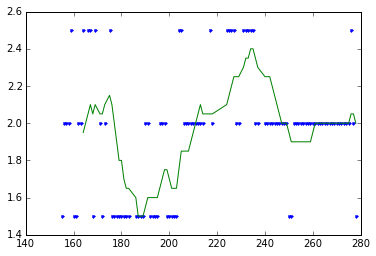

In [41]:
results_pair1_200 = results_dict['IMG1.JPG_IMG2.JPG']

raw_results_pair1_200 = []
image_rows = []

for patch in results_pair1_200:
    #for match_method in results_pair1[patch]
    raw_results_pair1_200.append([o.displacement for o in results_pair1_200[patch]['DistanceEuclidean']])
    image_rows = [o.row for o in results_pair1_200[patch]['DistanceEuclidean']]

averaged_results_pair1_200 = TSEDataUtils.calc_element_wise_average(raw_results_pair1_200)

filtered_results_pair1_200 = TSEDataUtils.filter_outliers_ab_dist_median(averaged_results_pair1_200)

image_rows = np.array(image_rows)[TSEDataUtils.filter_outliers_ab_dist_median_indices(averaged_results_pair1_200)]

y_moving_average = TSEDataUtils.calc_moving_average_array(np.array(filtered_results_pair1_200), 10)

plt.plot(image_rows, np.array(filtered_results_pair1_200), "b.")
plt.plot(image_rows[len(image_rows) - len(y_moving_average):], y_moving_average, "g-")
plt.show()

### Test 4: IMG1 - IMG12 - 100px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

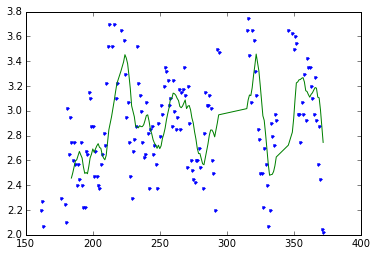

In [42]:
results = results_dict

raw_results_histcorrel = []
raw_results_ed = [] 
raw_results_histchisqr = [] 
raw_results_corr = []
image_rows = []

for image_pair in results:

    data_histcorrel = results[image_pair][100]['HistCorrel']
    data_histchisqr = results[image_pair][100]['HistChiSqr']
    data_ed = results[image_pair][100]['DistanceEuclidean']
    data_corr = results[image_pair][100]['DistanceCorr']
    
    raw_results_histcorrel.append([o.displacement for o in data_histcorrel])
    raw_results_ed.append([o.displacement for o in data_ed])
    raw_results_histchisqr.append([o.displacement for o in data_histchisqr])
    raw_results_corr.append([o.displacement for o in data_corr])
    
    image_rows = [o.row for o in data_corr]
    
averaged_results_histcorrel = TSEDataUtils.calc_element_wise_average(raw_results_histcorrel)
averaged_results_ed = TSEDataUtils.calc_element_wise_average(raw_results_ed)
averaged_results_histchisqr = TSEDataUtils.calc_element_wise_average(raw_results_histchisqr)
averaged_results_corr = TSEDataUtils.calc_element_wise_average(raw_results_corr)

averaged_results_all = TSEDataUtils.calc_element_wise_average([averaged_results_histcorrel, 
                                                                         averaged_results_ed, 
                                                                         averaged_results_histchisqr, 
                                                                         averaged_results_corr])

filtered_results = TSEDataUtils.filter_outliers_ab_dist_median(averaged_results_all)

image_rows = np.array(image_rows)[TSEDataUtils.filter_outliers_ab_dist_median_indices(averaged_results_all)]

y_moving_average = TSEDataUtils.calc_moving_average_array(np.array(filtered_results), 10)

plt.plot(image_rows, np.array(filtered_results), "b.")
plt.plot(image_rows[len(image_rows) - len(y_moving_average):], y_moving_average, "g-")
plt.show()

### Test 5: IMG1 - IMG12 - 200px patch - *DistanceEuclidean, DistanceCorr, HistCorrel, HistChiSqr*

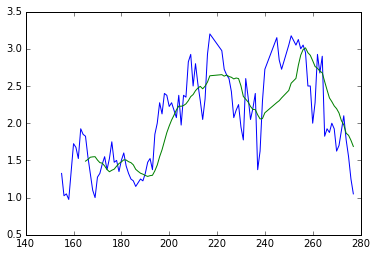

In [43]:
results = results_dict

raw_results_histcorrel = []
raw_results_ed = [] 
raw_results_histchisqr = [] 
raw_results_corr = []
image_rows = []

for image_pair in results:

    data_histcorrel = results[image_pair][200]['HistCorrel']
    data_histchisqr = results[image_pair][200]['HistChiSqr']
    data_ed = results[image_pair][200]['DistanceEuclidean']
    data_corr = results[image_pair][200]['DistanceCorr']
    
    raw_results_histcorrel.append([o.displacement for o in data_histcorrel])
    raw_results_ed.append([o.displacement for o in data_ed])
    raw_results_histchisqr.append([o.displacement for o in data_histchisqr])
    raw_results_corr.append([o.displacement for o in data_corr])
    
    image_rows = [o.row for o in data_corr]
    
averaged_results_histcorrel = TSEDataUtils.calc_element_wise_average(raw_results_histcorrel)
averaged_results_ed = TSEDataUtils.calc_element_wise_average(raw_results_ed)
averaged_results_histchisqr = TSEDataUtils.calc_element_wise_average(raw_results_histchisqr)
averaged_results_corr = TSEDataUtils.calc_element_wise_average(raw_results_corr)

averaged_results_all = TSEDataUtils.calc_element_wise_average([averaged_results_histcorrel, 
                                                                         averaged_results_ed, 
                                                                         averaged_results_histchisqr, 
                                                                         averaged_results_corr])

filtered_results = TSEDataUtils.filter_outliers_ab_dist_median(averaged_results_all)

image_rows = np.array(image_rows)[TSEDataUtils.filter_outliers_ab_dist_median_indices(averaged_results_all)]

y_moving_average = TSEDataUtils.calc_moving_average_array(np.array(filtered_results), 10)

plt.plot(image_rows, np.array(filtered_results), "b-")
plt.plot(image_rows[len(image_rows) - len(y_moving_average):], y_moving_average, "g-")
plt.show()